
# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● ‘No_show’ it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Dataset Description 

we have a cvs file that contains data we are going toanalysis.


### Question(s) for Analysis
1 - what foctors are important for us to know inorder to predict if paitent will show up for their schedualed appointment?

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties

In [26]:
df=pd.read_csv('noshowappointments-csv')

In [27]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [28]:
# Explor the shape of data
df.shape

(110527, 14)

Data contains of 110527 appointments(row) and 14 column

In [29]:
# Check for duplicates
df.duplicated().sum()

0

There is no duplicated values.

In [30]:
# Check the number of unique values
df['PatientId'].nunique()

62299

Only 62299 out of 110527 are unique values

In [31]:
# Check the number of duplicated patients IDS.
df['PatientId'].duplicated().sum()

48228

There are 48228 duplicated Id.

In [32]:
# Check the number of duplicated patients IDS and NOshow 
# to check if there were paitents IDs duplicated but differ in the No show status
df.duplicated(['PatientId','No-show']).sum()

38710

There are 38710 patients IDs have the same status of showing or no, we will remove them in the cleaning data stage.

In [33]:
# Inspection of missing values or any issues to be handeled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


As we see there are no missing Values.

In [34]:
# Getting some informations about our data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The mean age is 37, max age is 115, min age is -1 which is probably a mistake (i will remove it as it is only signal value and it wouldn't affect our analysis),
about 50% of ages are between 18 and 55 years old, about 25% received SMS majority dose not have chronic diseases.Bening alchohol addictive nor enrolled in scholarship.
                                                                               


Majority are not handcapped.

<a id='wrangling'></a>
## Clearing data


In [35]:
# Removing the -1 value for a
df.drop(index=99832,inplace=True)

In [36]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [37]:
# correction of columns names
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'No-show':'No_show'},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [38]:
# Removing duplicated IDS with duplicated showing status, leaving the duplicated IDS if they differ in showing status 
# as the same patient may have several appointments, attend some and absent from others.
df.drop_duplicates(['PatientId','No_show'],inplace=True)
df.shape

(71816, 14)

After removing the duplicated IDS with duplicated showing status, now the data contains of 110527 appointments(row) and 14 column

In [39]:
# Removing the unnecessary data
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling summary
After gathering data from the cvs file we exported the first raw of the data set to it's general properties, then we showed the dimensions of our data, then we have checked if there were any duplicated appointments.Then explored if there was duplicated patient IDs and removed them.
then we turned to data informations like data types and if there is any missing data to handle.then we saw some figures about our data like (mean, max, min),
and finally we cleaned our data by correcting column names and dropping the unnecessary informations.

<a id='wrangling'></a>
## Exploratory Data Analysis
Note that we have cleaned our data .so we are ready to move to exploration, Computing statistics and creating Visualizations with goal of addressing the research questions that i posed in introduction section.

<a id='wrangling'></a>
## General Look

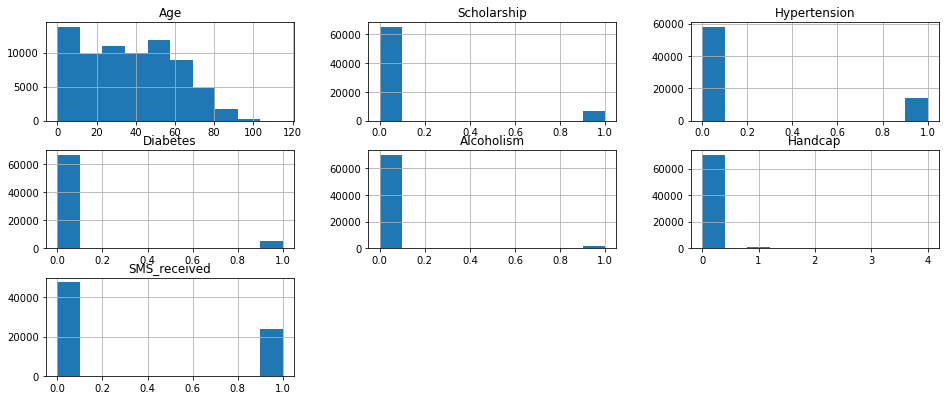

In [41]:
df.hist(figsize=(16,6.5));

In [47]:
# Dividing patients into 2 groups acc to showing or not then exploring them
show=df.No_show=='No'
noshow=df.No_show=='Yes'
df[show].count(),df[noshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

No.of showed partients is (541153), which is 3 times greater than Non showed (17663)

In [46]:
df[show].mean(),df[noshow].mean()

C:\Users\FABDEL~1\AppData\Local\Temp/ipykernel_7704/3233283171.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[show].mean(),df[noshow].mean()


(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64,
 Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

The mean age for showed patients is 37 while no showed mean age is 34, showed patients received SMS less than no show patients which means we have to revise our sms compaghine.

<a id='wrangling'></a>
## Investigation for influnacing factors on attendance rate

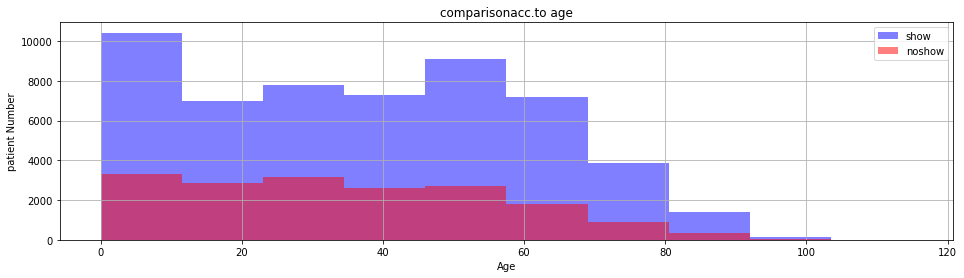

In [49]:
# Dose age affect the attendance
def attendance(df,col_name,attended,absent):# setting the figure size
    plt.figure(figsize=[16,4])
    df[col_name][show].hist(alpha=.5,bins=10,color='blue',label='show')
    df[col_name][noshow].hist(alpha=.5,bins=10,color='red',label='noshow')
    plt.legend();
    plt.title('comparisonacc.to age')
    plt.xlabel('Age')
    plt.ylabel('patient Number');
attendance(df,'Age',show,noshow)

Ages from 0:3 are the most showing (parents taking care of their kids) then from the 45:55 and the least attending are whom above 65 years old.

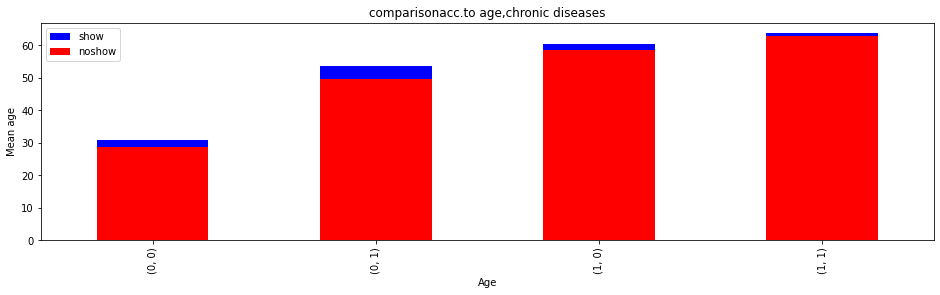

In [55]:
# Dose age and chronic diseases affect the attendance together
plt.figure(figsize=[16,4])# setting the figure size
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='blue',label='show')
df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title('comparisonacc.to age,chronic diseases')
plt.xlabel('Age')
plt.ylabel('Mean age');

In [56]:
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'],df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64,
 Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

The mean age of non chronic diseases showing patients is 30 and nonshowing is 28 , mean age of Hypertension  Diabetes showing patients is around 64 and nonshowing is about 63 which mean that there is correlation between age and chronic diseases, and no correlation between chronic diseases and attending

Doses gender affect attendance?

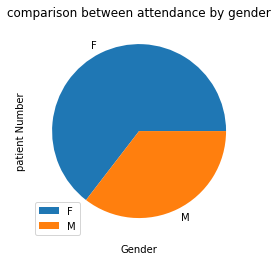

In [57]:
# what is the percentage of sexes attending?
def attendance(df,col_name,attended,absent):# setting the figure size
    plt.figure(figsize=[12,4])
    df[col_name][show].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend();
    plt.title('comparison between attendance by gender')
    plt.xlabel('Gender')
    plt.ylabel('patient Number');
attendance(df,'Gender',show,noshow)

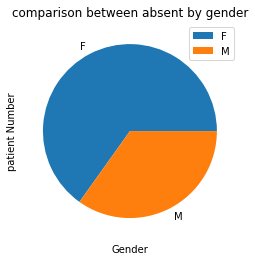

In [59]:
# what is the percentage of sexes attending?
def attendance(df,col_name,attended,absent):# setting the figure size
    plt.figure(figsize=[12,4])
    df[col_name][noshow].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend();
    plt.title('comparison between absent by gender')
    plt.xlabel('Gender')
    plt.ylabel('patient Number');
attendance(df,'Gender',show,noshow)

So gender has no clear effect on attendance

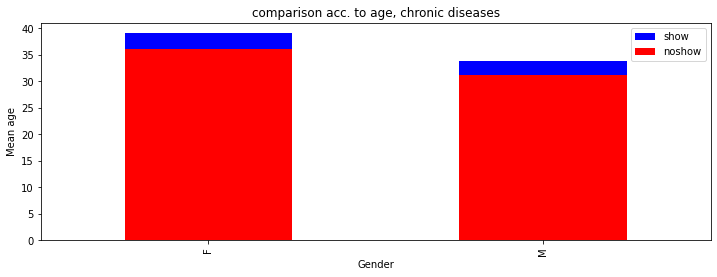

In [61]:
# Dose age and chronic gender affect attendance together (check by gender mean age)
plt.figure(figsize=[12,4])# setting figure size
df[show].groupby('Gender').Age.mean().plot(kind='bar',color='blue',label='show')
df[noshow].groupby('Gender').Age.mean().plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title('comparison acc. to age, chronic diseases')
plt.xlabel('Gender')
plt.ylabel('Mean age');

In [65]:
print(df[show].groupby('Gender').Age.mean(),df[noshow].groupby('Gender').Age.mean(),
df[show].groupby('Gender').Age.median(),df[noshow].groupby('Gender').Age.median())

Gender
F    39.130292
M    33.766269
Name: Age, dtype: float64 Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64 Gender
F    39.0
M    32.0
Name: Age, dtype: float64 Gender
F    34.0
M    29.0
Name: Age, dtype: float64


There is no correlation between age and gender affecting thw show rate 

The mean and the median of sexes ages are alomst the same

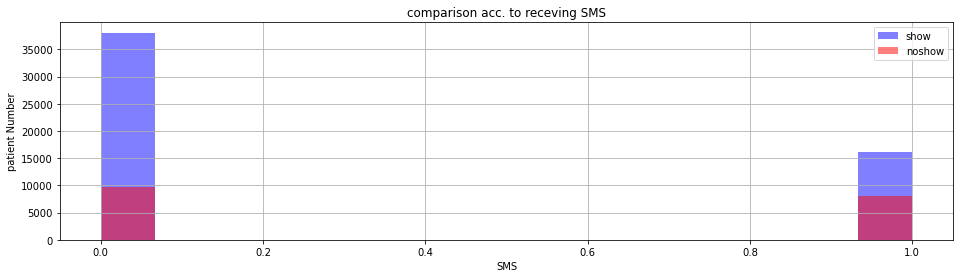

In [66]:
# Dose receiving SMS affect the attendance
def attendance(df,col_name,attended,absent):# setting the figure size
    plt.figure(figsize=[16,4])
    df[col_name][show].hist(alpha=.5,bins=15,color='blue',label='show')
    df[col_name][noshow].hist(alpha=.5,bins=15,color='red',label='noshow')
    plt.legend();
    plt.title('comparison acc. to receving SMS')
    plt.xlabel('SMS')
    plt.ylabel('patient Number');
attendance(df,'SMS_received',show,noshow)

Number of showing patients without receiving sms is greaterv than showing patients with receving sms ,which mean that we need to revisit our SMS compaghine.

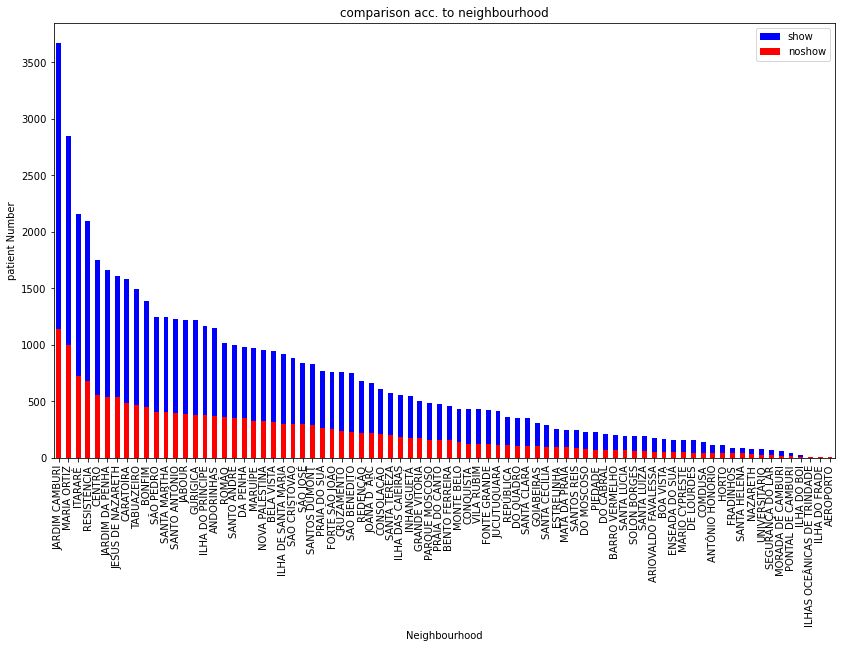

In [67]:
# Dose neighbourhood affect the attendance 
plt.figure(figsize=[14,8])
df.Neighbourhood[show].value_counts().plot(kind='bar',color='blue',label='show')
df.Neighbourhood[noshow].value_counts().plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title('comparison acc. to neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('patient Number');

Neighbourhood has greater effect on attendance or not.JORDIM CAMBURI has the greatest number of patients and also has greaterst showing rate.

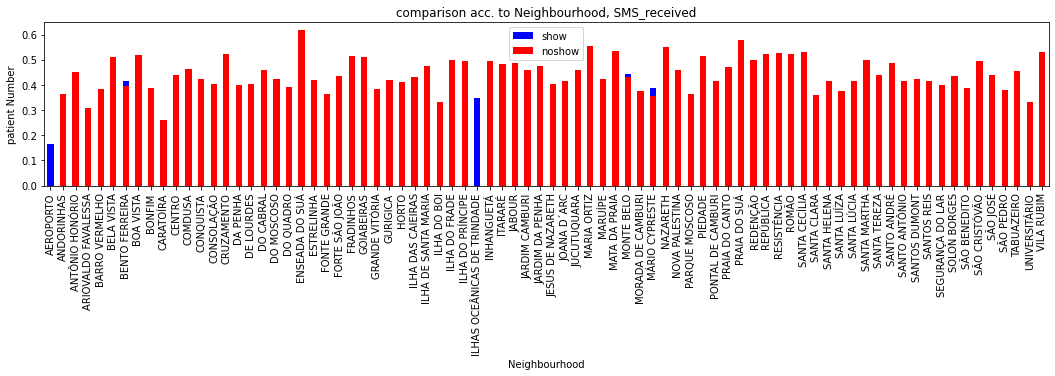

In [71]:
plt.figure(figsize=[18,3])
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='blue',label='show')
df[noshow].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='red',label='noshow')
plt.legend()
plt.title('comparison acc. to Neighbourhood​, SMS_received')
plt.xlabel('Neighbourhood')
plt.ylabel('patient Number');

SMS has response in only 5 Neighbourhood ILHAS OCEANICAS DE TRINDADE is the most responsive Neighbourhood to SMS

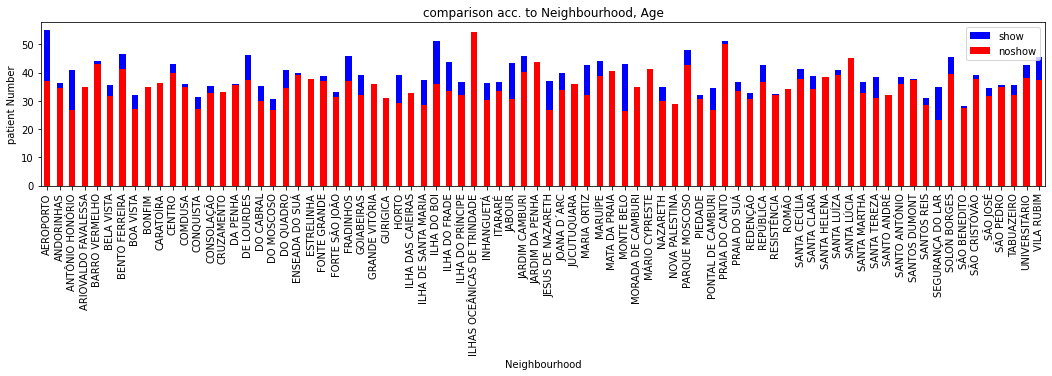

In [73]:
plt.figure(figsize=[18,3])
df[show].groupby('Neighbourhood').Age.mean().plot(kind='bar',color='blue',label='show')
df[noshow].groupby('Neighbourhood').Age.mean().plot(kind='bar',color='red',label='noshow')
plt.legend()
plt.title('comparison acc. to Neighbourhood​, Age')
plt.xlabel('Neighbourhood')
plt.ylabel('patient Number');

Patient attendance from specific Neighbourhood differ acc to ages, AEROPORTO then ILHA DO BOI are with high ages attendance

<a id='wrangling'></a>
## Conclusion

Neighbourhood has graet affect on attendance or not,JORDIM CAMBURI has the greatest number of patients and also has greaterst showing rate.

Number of showing patients from specific Neighbourhood affected by receving SMS and Ages.

Age has clear influance on showing rate Ages from 0:3 are the most showing (parents taking care of their kids) then from the 45:55 and the least attending are whom above 65 years old.

Number of showing patients without receving sms is graeter than showing patient with receiving sms, which means that we need to revisit our sms compaghin.

<a id='wrangling'></a>
## Limitations

No clear correlation between showing and gender , chronic diseases , enrollement in the welfare program.